### Biblioteki używane w rozwiązaniu zadań

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Zadanie 1

W tym zadaniu należy przekształcić każde z trzech równań do postaci równoważnego układu równań pierwszego rzędu.
- równanie Van der Pol'a: $y''=y'(1-y^2)-y$
- równanie Blasiusa: $y'''=-yy''$
- II zasada dynamiki Newtona dla problemu dwóch ciał: $$ y_1''=-GMy_1/(y_1^2+y_2^2)^{3/2} \\ y_2''=-GMy_2/(y_1^2+y_2^2)^{3/2} $$

**Jako że to zadanie nie wymaga zaprzęgnięcia narzędzi programistycznych, rozwiązanie znajduje się w sprawozdaniu.**

## Zadanie 2

W zadaniu drugim celem jest rozwiązanie numeryczne równania różniczkowego zwyczajnego $y'=-5y$. Warunkiem początkowym jest $y(0)=1$, przyjmujemy krok $h=0.5$.

In [2]:
# Zapis warunków zadania z polecenia
y0 = 1.0
h2 = 0.5

def f(y):
    return -5 * y # wynika to z przyjętej konwencji y' = f(t, y)

Używamy metody Eulera - w wersji jawnej i niejawnej. Zapiszmy te algorytmy poniżej.
- jawna metoda Eulera: $y_{k+1}=y_k+h_kf(t_k,y_k)$, 
- niejawna metoda Eulera: $y_{k+1}=y_k+h_kf(t_{k+1},y_{k+1})$

---

W przypadku metody niejawnej, po rozwikłaniu zmiennej $y_{k+1}$ otrzymujemy $y_{k+1}=\frac{2}{7}y_k$.

In [3]:
def Euler_explicit(yk, hk, f): # metoda jawna
    return yk + hk * f(yk)

# Zadziała tylko dla naszego przypadku, ale będzie szybkie i proste w implementacji
def Euler_implicit(yk): # metoda niejawna
    return (2 / 7) * yk 

### Analityczna stabilność

In [4]:
def y(t): # analityczne rozwiązanie równania
    return np.exp(-5 * t)

Analitycznym ozwiązaniem równania jest $y(t) = e^{-5t}$. Jest to stabline rozwiązanie. Można to udowodnić wprost z definicji (co zostało zrobione w sprawozdaniu), ale również analizując rozwiązanie równania dla zaburzonego warunku początkowego $\hat{y}(t) = \hat{y}_0e^{-5t}$. Możemy zauważyć, że zaburzenie wnosi liniowy współczynnik do ostatecznego wzoru, kiedy wraz ze wzrostem $t$, nasze rozwiązanie eksponencjalnie szybko maleje, co może być intuicyjnym wyjaśnieniem stabilności tego równania.

### Numeryczna stabilność

Nasze równanie jest numeryczne stabilne dla niejawnej metody Eulera, ale jest niestabilne dla jawnej postaci tej metody. Numeryczne uzasadnienie tego faktu (przeprowadzając odpowiednie obliczenia) przedstawiamy w sprawozdaniu. Sprawdźmy teraz, jak dokładne będą metody Eulera w praktyce.

In [5]:
# Przyjęte przez nas parametry
START = 0
END = 15

explicit_res = [y0]
implicit_res = [y0]

n = round((END - START) / h2) # liczba iteracji

In [6]:
for i in range(n):
    explicit_res.append(Euler_explicit(explicit_res[i], h2, f))
    implicit_res.append(Euler_implicit(implicit_res[i]))

Zbadajmy wartości uzyskane w obu wersjach metody Eulera i porównajmy je z rzeczywistą wartością.

In [7]:
# interesujące nas rozwiązania dla t = 0.5
print("Actual value:   ", y(0.5))
print("Explicit Euler: ", explicit_res[1])
print("Implicit Euler: ", implicit_res[1])

Actual value:    0.0820849986238988
Explicit Euler:  -1.5
Implicit Euler:  0.2857142857142857


Poniżej przedstawiamy wykresy w skali logarytmicznej: na pierwszym są wartości dla badanych metod oraz wartości rzeczywistego rozwiązania, a drugi jest wykresem błędu względnego obu metod.

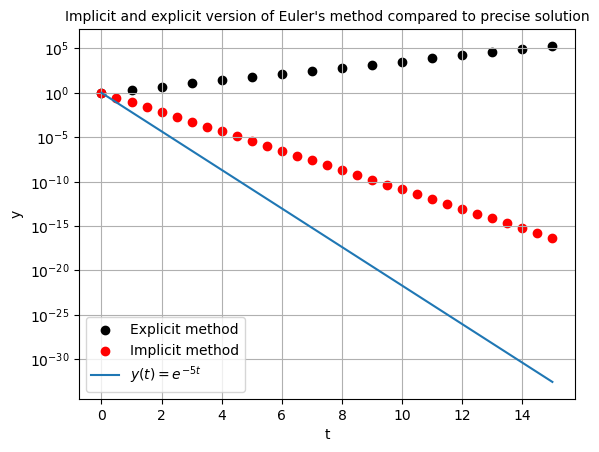

In [8]:
x_values = np.linspace(START, END, n + 1)
plt.scatter(x_values, explicit_res, color = 'black', label = "Explicit method")
plt.scatter(x_values, implicit_res, color = 'red', label = "Implicit method")
plt.semilogy(x_values, y(x_values), label = r'$y(t) = e^{-5t}$')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Implicit and explicit version of Euler\'s method compared to precise solution", fontsize = 10)
plt.legend()
plt.grid(True)

Podobnie jak w poprzednich laboratoriach, definiujemy pomocniczą funkcję do obliczania błędu względnego i go obliczamy dla obu metod.

In [9]:
def relative_err(res, val): 
    return np.abs(val - res) / val

In [10]:
relative_err_explicit = [relative_err(explicit_res[i], y(i * h2)) for i in range(n + 1)]
relative_err_implicit = [relative_err(implicit_res[i], y(i * h2)) for i in range(n + 1)]

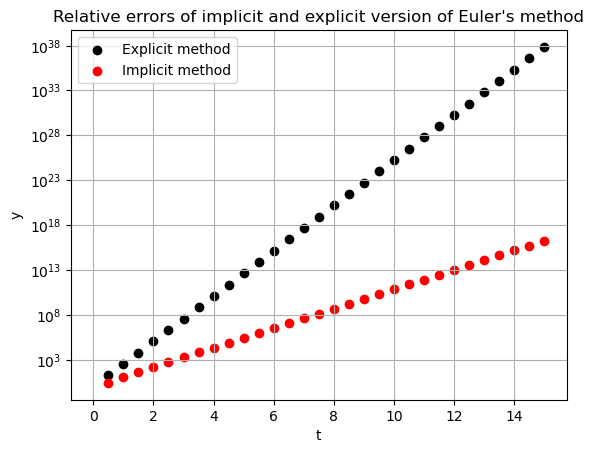

In [11]:
x_values = np.linspace(START, END, n + 1)
plt.yscale("log")
plt.scatter(x_values, relative_err_explicit, color = 'black', label = "Explicit method")
plt.scatter(x_values, relative_err_implicit, color = 'red', label = "Implicit method")
# plt.plot(x_values, y(x_values), label = r'$g_1(x)$')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Relative errors of implicit and explicit version of Euler\'s method")
plt.legend()
plt.grid(True)

## Zadanie 3

W ramach zadania 3. modelujemy przebieg epidemii w populacji, korzystając z modelu (*SIR*) Kermack'a-McKendrick'a. Szczegółowy opis kategorii w populacji w tym modelu oraz przyjęte założenia znajdują się w sprawozdaniu.

---

W tym zadaniu oprócz metody Eulera (jawnej i niejawnej), korzystamy także z metody Rungego-Kutty rzędu czwartego (RK4). Poniżej zapisujemy algorytmy w ramach tej metody. Nieco modyfikujemy konwencję zapisu w porównaniu do tej z polecenia zadania, aby ułatwić obliczenia i dostosować te metody do specyfiki zadania.

In [12]:
def explicit_Euler(f, yk, hk, I, S, N):
    return yk + hk * f(yk, I, S, N)

# Zadziała tylko dla użytego modelu
def implicit_Euler(f, hk, I, S, N, R): # f pełni tu rolę flagi
    if f is fS:
        return 1 / (1 + hk * beta / N * I) * S
    elif f is fI:
        return 1 / (1 + hk * gamma - hk * beta / N * S) * I
    else:
        return R + hk * gamma * I

def Runge_Kutta4(f, yk, hk, I, S, N):
    # pomocnicze wielkości
    k1 = f(yk, I, S, N)
    k2 = f(yk + hk * k1 / 2, I, S, N)
    k3 = f(yk + hk * k2 / 2, I, S, N)
    k4 = f(yk + hk * k3, I, S, N)
    
    return yk + hk / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

Poniżej, zgodnie z poleceniem zadania, zapisujemy przyjęte wartości początkowe dla populacji oraz wartości współczynników.

In [13]:
# wartości początkowe populacji
S0 = 762
I0 = 1
R0 = 0
N0 = S0 + I0 + R0 # N0 = 763

# wartości charakterystycznych współczynników
beta = 1
gamma = 1 / 7

W zadaniu 3. całkujemy od $t=0$ do $t=14$, przyjmując krok $h=0.2$. Zapiszmy to poniżej.

In [14]:
# parametry używane w algorytmach
t_start = 0
t_end = 14
h3 = 0.2

Zanim przejdziemy do rozwiązania układu równań w ramach przyjętego w tym zadaniu modelu, określmy funkcje $f$ dla każdego z komponentów, zgodnie z założeniami modelu. Niektóre z pozostałych komponentów nie są używane przy obliczaniu danej wielkości, ale chcemy (dla ułatwienia obliczeń) zachować podobieństwo sygnatur funkcji.

In [15]:
def fS(S, I, temp, N): # funkcja dla komponentu S - temp jest nieużywane
    return -beta / N * I * S

def fI(I, temp, S, N): # funkcja dla komponentu I - temp jest nieużywane
    return beta / N * I * S - gamma * I

def fR(temp, I, S, N): # funkcja dla komponentu R - temp, S i N są nieużywane
    return gamma * I

Poniżej przeprowadzamy obliczenia zgodnie z wymienionymi wcześniej parametrami, wykorzystując trzy metody. 

--- 

Zacznijmy od wykorzystania jawnej metody Eulera i przedstawmy wyniki na wykresie.

In [16]:
n = round((t_end - t_start) / h3 + 1)

S_Euler_explicit = np.zeros(n)
I_Euler_explicit = np.zeros(n)
R_Euler_explicit = np.zeros(n)
N_Euler_explicit = np.zeros(n)

S_Euler_explicit[0] = S0
I_Euler_explicit[0] = I0
R_Euler_explicit[0] = R0
N_Euler_explicit[0] = N0

for i in range(1, n):
    S_Euler_explicit[i] = explicit_Euler(fS, S_Euler_explicit[i - 1], h3, I_Euler_explicit[i - 1],
                                         S_Euler_explicit[i - 1], N_Euler_explicit[i - 1])
    I_Euler_explicit[i] = explicit_Euler(fI, I_Euler_explicit[i - 1], h3, I_Euler_explicit[i - 1],
                                         S_Euler_explicit[i - 1], N_Euler_explicit[i - 1])
    R_Euler_explicit[i] = explicit_Euler(fR, R_Euler_explicit[i - 1], h3, I_Euler_explicit[i - 1],
                                         S_Euler_explicit[i - 1], N_Euler_explicit[i - 1])
    N_Euler_explicit[i] = S_Euler_explicit[i] + I_Euler_explicit[i] + R_Euler_explicit[i]

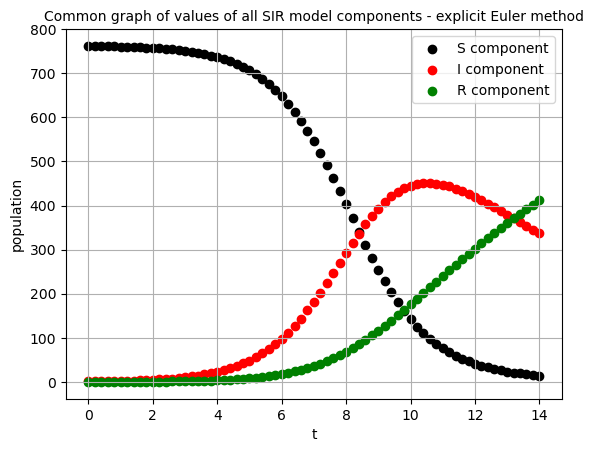

In [17]:
t_values = np.linspace(t_start, t_end, n)
plt.scatter(t_values, S_Euler_explicit, color = 'black', label = "S component")
plt.scatter(t_values, I_Euler_explicit, color = 'red', label = "I component")
plt.scatter(t_values, R_Euler_explicit, color = 'green', label = "R component")
plt.xlabel('t')
plt.ylabel('population')
plt.title("Common graph of values of all SIR model components - explicit Euler method", fontsize = 10)
plt.legend()
plt.grid(True)

Teraz przeprowadzamy podobne rozumowanie dla niejawnej wersji metody Eulera.

In [18]:
S_Euler_implicit = np.zeros(n)
I_Euler_implicit = np.zeros(n)
R_Euler_implicit = np.zeros(n)
N_Euler_implicit = np.zeros(n)

S_Euler_implicit[0] = S0
I_Euler_implicit[0] = I0
R_Euler_implicit[0] = R0
N_Euler_implicit[0] = N0

for i in range(1, n):
    S_Euler_implicit[i] = implicit_Euler(fS, h3, I_Euler_implicit[i - 1], S_Euler_implicit[i - 1], 
                                         N_Euler_implicit[i - 1], R_Euler_implicit[i - 1])
    I_Euler_implicit[i] = implicit_Euler(fI, h3, I_Euler_implicit[i - 1], S_Euler_implicit[i - 1], 
                                         N_Euler_implicit[i - 1], R_Euler_implicit[i - 1])
    R_Euler_implicit[i] = implicit_Euler(fR, h3, I_Euler_implicit[i - 1], S_Euler_implicit[i - 1], 
                                         N_Euler_implicit[i - 1], R_Euler_implicit[i - 1])
    N_Euler_implicit[i] = S_Euler_implicit[i] + I_Euler_implicit[i] + R_Euler_implicit[i]

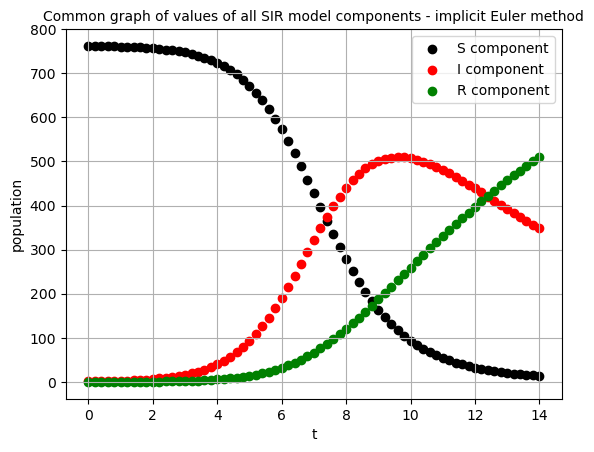

In [19]:
t_values = np.linspace(t_start, t_end, n)
plt.scatter(t_values, S_Euler_implicit, color = 'black', label = "S component")
plt.scatter(t_values, I_Euler_implicit, color = 'red', label = "I component")
plt.scatter(t_values, R_Euler_implicit, color = 'green', label = "R component")
plt.xlabel('t')
plt.ylabel('population')
plt.title("Common graph of values of all SIR model components - implicit Euler method", fontsize = 10)
plt.legend()
plt.grid(True)

Pozostało sprawdzić, jak poradzi sobie metoda Rungego-Kutty.

In [20]:
S_Runge_Kutta = np.zeros(n)
I_Runge_Kutta = np.zeros(n)
R_Runge_Kutta = np.zeros(n)
N_Runge_Kutta = np.zeros(n)

S_Runge_Kutta[0] = S0
I_Runge_Kutta[0] = I0
R_Runge_Kutta[0] = R0
N_Runge_Kutta[0] = N0

for i in range(1, n):
    S_Runge_Kutta[i] = Runge_Kutta4(fS, S_Runge_Kutta[i - 1], h3, I_Runge_Kutta[i - 1],
                                    S_Runge_Kutta[i - 1], N_Runge_Kutta[i - 1])
    I_Runge_Kutta[i] = Runge_Kutta4(fI, I_Runge_Kutta[i - 1], h3, I_Runge_Kutta[i - 1],
                                    S_Runge_Kutta[i - 1], N_Runge_Kutta[i - 1])
    R_Runge_Kutta[i] = Runge_Kutta4(fR, R_Runge_Kutta[i - 1], h3, I_Runge_Kutta[i - 1],
                                    S_Runge_Kutta[i - 1], N_Runge_Kutta[i - 1])
    N_Runge_Kutta[i] = S_Runge_Kutta[i] + I_Runge_Kutta[i] + R_Runge_Kutta[i]

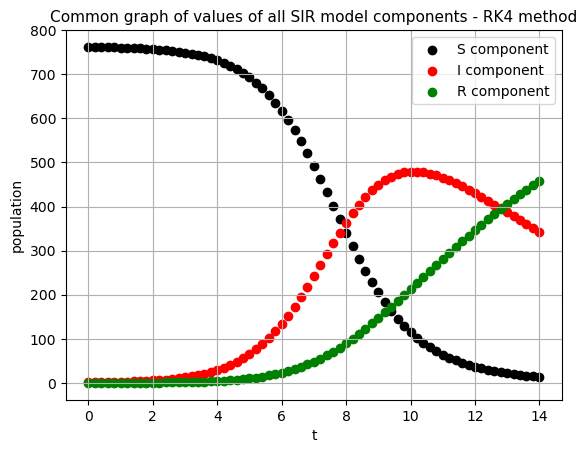

In [21]:
t_values = np.linspace(t_start, t_end, n)
plt.scatter(t_values, S_Runge_Kutta, color = 'black', label = "S component")
plt.scatter(t_values, I_Runge_Kutta, color = 'red', label = "I component")
plt.scatter(t_values, R_Runge_Kutta, color = 'green', label = "R component")
plt.xlabel('t')
plt.ylabel('population')
plt.title("Common graph of values of all SIR model components - RK4 method", fontsize = 11)
plt.legend()
plt.grid(True)

Teraz przedstawmy na wspólnym wykresie wyniki $S(t)+I(t)+R(t)$ znalezione przez każdą metodę. 

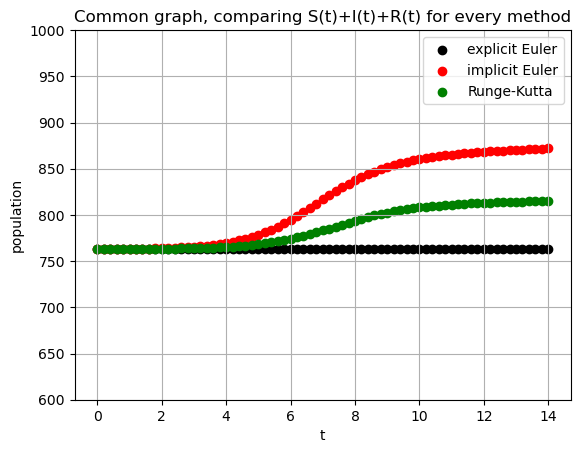

In [22]:
t_values = np.linspace(t_start, t_end, n)
plt.scatter(t_values, N_Euler_explicit, color = 'black', label = "explicit Euler")
plt.scatter(t_values, N_Euler_implicit, color = 'red', label = "implicit Euler")
plt.scatter(t_values, N_Runge_Kutta, color = 'green', label = "Runge-Kutta")
plt.xlabel('t')
plt.ylabel('population')
plt.ylim(600, 1000)
plt.title("Common graph, comparing S(t)+I(t)+R(t) for every method")
plt.legend()
plt.grid(True)

Jak można zauważyć, niezmiennik $S(t)+I(t)+R(t) \equiv N$ nie jest zachowany dla metody Eulera w wersji niejawnej oraz dla metody Rungego-Kutty. W obu przypadkach liczebność populacji rośnie, osiagając w chwili $t=14$ około 870 osób dla metody Eulera oraz nieco mniej, około 815 osób dla metody Rungego-Kutty. Tymczasem początkowa liczebność wynosi 763 osoby i wydaje się ona być zachowana dla metody Eulera w wersji jawnej.

---

Zbadajmy dokładnie te wartości poniżej.

In [23]:
print("Końcowy stan populacji dla metody Eulera - niejawnej:", round(N_Euler_implicit[-1]))
print("Końcowy stan populacji dla metody Rungego-Kutty(RK4):", round(N_Runge_Kutta[-1]))
print("Końcowy stan populacji dla metody Eulera - jawnej:   ", round(N_Euler_explicit[-1]))

Końcowy stan populacji dla metody Eulera - niejawnej: 872
Końcowy stan populacji dla metody Rungego-Kutty(RK4): 815
Końcowy stan populacji dla metody Eulera - jawnej:    763


Przekonajmy się, czy w każdym kroku obliczeń stan populacji w wersji jawnej metody Eulera wynosi 763.

In [24]:
rounded_N = np.array([round(N) for N in N_Euler_explicit])
print("Czy w każdym kroku obliczeń stan populacji w wersji jawnej metody Eulera wynosi 763?",
      np.all(rounded_N == 763))

Czy w każdym kroku obliczeń stan populacji w wersji jawnej metody Eulera wynosi 763? True


Zatem niezmiennik jest zachowany tylko dla metody Eulera w wesji jawnej.

---

Teraz przejdźmy do dalszej części zadania. Zapiszmy informacje z polecenia w postaci tablic numpy'owych.

In [25]:
T = np.arange(t_start, t_end + 1)
I = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])

Wybieramy metodę jawną Eulera do dalszych obliczeń. Najpierw minimalizujemy funkcję kosztu, którą jest suma kwadratów reszt. Argumentem tej funkcji jest $\theta=[\beta, \gamma]$, można go utożsamiać z punktem w przestrzeni $R^2$. W celu minimalizacji tej funkcji korzystamy z metody Neldera-Meada.

---

Poniżej zbieramy w funkcję kod obliczający wartości liczby osób zainfekowanych ($I$) dla podanych wartości parametrów w kolejnych punktach czasowych.

In [26]:
def calc_infectious(n, h, beta, gamma):
    S = np.zeros(n) # potrzebujemy S do obliczenia I
    I = np.zeros(n)
    N = S0 + I0

    S[0] = S0
    I[0] = I0

    for i in range(1, n):
        S[i] = S[i - 1] - h * beta / N * I[i - 1] * S[i - 1]
        I[i] = I[i - 1] + h * beta / N * I[i - 1] * S[i - 1] - gamma * I[i - 1]
        
    return I

Zanim przejdziemy do funkcji kosztu, określmy liczbę punktów na siatce czasowej oraz krok metody na podstawie podanych w poleceniu informacji.

In [27]:
n = T.shape[0]
h = T[1] - T[0]

In [28]:
def cost_fun1(p):
    I_vals = calc_infectious(n, h, p[0], p[1]) 
    return np.sum(np.square(I - I_vals))

Teraz wykorzystując biblioteczną funkcję `minimize`, wyznaczymy optymalne wartości parametrów dla przyjętej funkcji kosztu.

In [29]:
# Przyjmujemy wartość S0 taką, jak była wcześniej
S0, I0 = 762, I[0]

# Przykładowa wartość początkowa - wartości współrzędnych punktu reprezentują wartości parametrów
P1 = np.array([2, 0.25])

In [30]:
P_min1 = minimize(fun = cost_fun1, x0 = P1, method = 'Nelder-Mead', 
                 bounds = [(0, float("inf")), (0, float("inf"))])['x']

Zobaczmy, jakie zostały znalezione wartości parametrów $\beta$ i $\gamma$, dla których funkcja kosztu przyjmuje możliwie małą wartość.

In [31]:
print("Optymalna wartość parametru beta: ", P_min1[0])
print("Optymalna wartość parametru gamma:", P_min1[1])

Optymalna wartość parametru beta:  2.1461505278143127
Optymalna wartość parametru gamma: 0.6035548555117101


Zobaczmy, jak kształtuje się liczba osób zainfekowanych w kolejnych dniach dla tych wartości parametrów.

In [32]:
I_min1 = calc_infectious(n, h, P_min1[0], P_min1[1])
rounded_I1 = [round(i) for i in I_min1]
print(rounded_I1)

[1, 3, 6, 16, 40, 96, 207, 349, 326, 132, 53, 21, 8, 3, 1]


Mając wartości obu parametrów, możemy obliczyć wartość współczynnika reprodukcji $R_0=\beta / \gamma$.

In [33]:
print("Wartość współczynnika reprodukcji R0 to:", P_min1[0] / P_min1[1])

Wartość współczynnika reprodukcji R0 to: 3.555849991455621


Teraz powtórzmy obliczenia, ale przyjmując inną funkcję kosztu, daną wzorem:
$$
    L(\theta)=-\sum_{i=0}^TI_i\textrm{ln}\hat{I}_i+\sum_{i=0}^T\hat{I}_i,
$$
który jest szerzej opisany w sprawozdaniu.

In [34]:
def cost_fun2(p):
    I_vals = calc_infectious(n, h, p[0], p[1]) 
    return -np.sum(I * np.log(I_vals)) + np.sum(I_vals)

Pozostałe czynności przeprowadzamy analogicznie.

In [35]:
P_min2 = minimize(fun = cost_fun2, x0 = P1, method = 'Nelder-Mead', 
                 bounds = [(0, float("inf")), (0, float("inf"))])['x']

print("Optymalna wartość parametru beta: ", P_min2[0])
print("Optymalna wartość parametru gamma:", P_min2[1])

I_min2 = calc_infectious(n, h, P_min2[0], P_min2[1])
rounded_I2 = [round(i) for i in I_min2]
print("\nLiczba osób zainfekowanych w kolejnych dniach:")
print(rounded_I2)

print("\nWartość współczynnika reprodukcji R0 to:", P_min2[0] / P_min2[1])

Optymalna wartość parametru beta:  2.237851623237748
Optymalna wartość parametru gamma: 0.43876740112392487

Liczba osób zainfekowanych w kolejnych dniach:
[1, 3, 8, 22, 59, 152, 340, 506, 286, 160, 90, 50, 28, 16, 9]

Wartość współczynnika reprodukcji R0 to: 5.10031423826241
